In [32]:
import numpy as np
from itertools import product
import pandas as pd

### Задача 1

Контрольная работа состоит из пяти вопросов. На каждый вопрос приведено четыре варианта ответа, один из которых правильный. Случайная величина X задаёт число правильных ответов при простом угадывании. Составьте закон распределения случайной величины X. Найдите математическое ожидание и дисперсию данной случайной величины.

У нас имеется некотая случайная величина, которое отражает число угадываний каждому из которых соответствует некоторая вероятность. Нам известно, что для 1 угадывания вероятность 1/4. Вообще говоря - в данном случае 1 угадывание - это элементарное событие. А случайная величина для одного события - это 0 или 1. Причем вероятности для событий и 1 и 0 нам известны. Исходя из этого можно выяснить вероятность разного числа угадываний. Число комбинаций кстати $2^5$

In [29]:
combinations = np.array(list(product((i for i in [1, 0]), repeat=5)))

probabilities = np.prod(np.where(combinations == 1, 0.25, 0.75), axis=1)
combination_sums = combinations.sum(1)

В первой строчке получаем всевозможные комбинации для ответов, во второй сводим комбинации с вероятностями выпадения ответов. Получаем матрицу вероятностей для комбинаций ответов. Вероятности внутри строк матрицы перемножаем - это массив вероятностей исходов для комбинаций. В матрице комбинаций суммируем значения строк, получаем различные вырианты случайной переменной. На базе этого построим DataFrame

In [39]:
prob_matrix = pd.DataFrame({'combination_sum': combination_sums, 'probability': probabilities})
prob_matrix.head(10)

,combination_sum,probability
0,5,0.000977
1,4,0.002930
2,4,0.002930
3,3,0.008789
4,4,0.002930
5,3,0.008789
6,3,0.008789
7,2,0.026367
8,4,0.002930
9,3,0.008789


Т.к. различные комбинации - это несовместные события, то, все варианты комбинаций с одинаковыми суммами можно сгруппировать и получить объединенную вероятность (ну т.е. сложить вероятности). Т.о. получим вероятности исходов для 5, 4 и т.д. до 0. 

In [40]:
common_probs = prob_matrix.groupby('combination_sum')['probability'].sum()

common_probs

combination_sum
0    0.237305
1    0.395508
2    0.263672
3    0.087891
4    0.014648
5    0.000977
Name: probability, dtype: float64

Отобразим закон распределения на графике

In [41]:
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

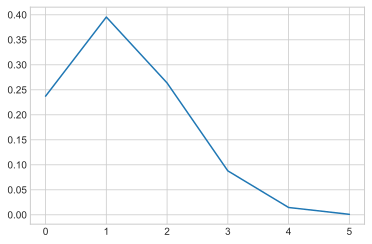

In [43]:
plt.plot(common_probs)

Найдем мат.ожидание и дисперсию.

In [44]:
type(np.array([]))

numpy.ndarray

In [70]:
def math_expectation(x: np.ndarray, probs: np.ndarray) -> float:
    return (x * probs).sum()

def dispersion(x: np.ndarray, probs: np.ndarray) -> float:
    m = math_expectation(x, probs)
    z_values = (x - m) ** 2
    return math_expectation(z_values, probs)

In [71]:
math_expectation(np.array(list(common_probs.index)), np.array(common_probs))

1.25

In [72]:
dispersion(np.array(list(common_probs.index)), np.array(common_probs))

0.9375

Возможно кстати эту задачу можно было бы решить через формулу Бернулли.

In [116]:
def combinations(n: int, k: int) -> int:
    """Число сочетаний.
    """
    
    return np.math.factorial(n) // (np.math.factorial(k) * np.math.factorial(n - k))

def bernulli(n: int, p: float) -> list:
    """Расчет биномиального закона формулой Бернулли
    """
    return [(combinations(n, i) * (p**i) * ((1-p)**(n-i))) for i in range(n + 1)]

def math_expectation_bin(n: int, p: float) -> float:
    """Расчет мат. ожидания для биномиального закона
    """
    return n * p

def dispersion_bin(n: int, p: float) -> float:
    """Расчет дисперсии для биномиального закона
    """
    return n * p * (1 - p)

In [118]:
n = 5
p = 0.25

binom_probs = np.array(bernulli(n, p))

binom_probs

array([0.23730469, 0.39550781, 0.26367188, 0.08789062, 0.01464844,
       0.00097656])

In [119]:
print(math_expectation_bin(n, p))

print(dispersion_bin(n,p))

1.25
0.9375


Действительно, так тоже можно.

### Задача 2

Пользователь получает в среднем 10 писем со спамом на свой почтовый ящик за сутки. Найти число N, такое, что с вероятностью 0.95 пользователь получит не более N писем со спамом за текущий день.

Нам известно, что пользователь получает в среднем 10 писем за день. Т.е. нам известно среднее значение случайной величины за единицу времени: $\lambda = 10$. Так-же нас просят найти количество писем N, не более которого получит пользователь за день с определенной вероятностью. Т.е. вероятности наступления событий от 0 до N нужно сложить, и если получилось 95 - это необходимый результат. Т.к. величина дискретная, то вероятность в 95% можно и не получить, тогда будем считать N такое, что сумма вероятностей для значений от 0 до N >= 95, но при этом сумма вероятностей для значений от 0 до N-1 < 95 

In [120]:
def poisson_proba(k: int, lambda_: float) -> float:
    """Формула Пуассона.
    """
    
    return (lambda_ ** k) * (np.exp(-lambda_)) / np.math.factorial(k)

In [139]:
task_condition = False
count = 0

while not task_condition:
    result = sum(poisson_proba(k=i, lambda_=10) for i in range(0, count + 1))
    if result >= 0.95:
        task_condition = True
    else:
        count += 1

In [140]:
count, result

(15, 0.9512595966960214)

Т.е. пользователь получит не более 15 писем с вероятностью 95%

### Задача 3

Производятся выстрелы по мишени. Вероятность попадания в мишень при одном выстреле равна 0.01. Сколько выстрелов нужно сделать чтобы быть уверенным с вероятностью 0.9, что хотя бы 6 раз будет совершено попадание?

Подсказка: 1) "Вероятность попасть k раз при n выстрелах" - на какое распределение это похоже? 2) А если нам нужна вероятность P(X >= k), а не P(X = k)? 3) Здесь предстоит немножко покодить.

Вероятность попадания в мишень при одном выстреле равна 0.01. Это можно использовать для определения количества выстрелов для наступения события 1 попадания с определенной вероятностью. Это геометриеское распределение.

In [141]:
def geo_distribution(p: float, k: int) -> float:
    return (1 - p) ** k * p

In [ ]:
# p = 0.01

# task_condition = False
# count = 1

# while not task_condition:
#     result = geo_distribution(p, count)
#     if result >= 0.9:
#         task_condition = True
#     else:
#         count += 1

In [156]:
(1 - 0.01) ** 1000 * 0.01

4.3171247410657863e-07

Что-то тут не то... ушли в бесконечный цикл. Еще раз.

У нас известна вероятность для 1 выстрела. А что у нас с вероятностями для 2 выстрелов. Вероятность попасть от 0 до n раз из двух выстрелов будет определяться биномиальным распределением. Следовательно вероятность попасть 1 раз из 2 выстрелов - это вероятность попасть первый раз и не попасть второй плюс наоброт.

Тогда вероятность попасть в мишень n и более раз (например, 1 и 2 раза при двух выстрелах, будет определяться суммой этих вероятснотей).

Нас интересует 6 выстрелов. Значит как минимум нам нужно выстрелить 6 раз, правда при 6 выстрелах вероятность попадания будет только для 1 комбинации из 6, а с учетом того, что попадание - это 0.01, а сумма случайных велечин - это произведение вероятностей, то получаем вероятность попасть 6 раз при 6 выстрелах $0.01^6$

Однако для большего количество выстрелов, ма получаем большее количество элементарных исходов, к тому-же нас интересуют и возможности сделать больше 6 попаданий. Можно последовательно увеличчивать число выстрелов и используя биномиальное распределение складывать все вероятности для суммы случайных событий больше или равно 6, как только получим и закончим перебор, при условии, что сумма $P(X_i)$ для X от 6 до n больше или равна 0.9

In [157]:
p = 0.01

bernulli(6, p)

[0.941480149401,
 0.057059402993999996,
 0.001440894015,
 1.9405980000000006e-05,
 1.47015e-07,
 5.940000000000001e-10,
 1.0000000000000002e-12]

In [188]:
n = 100

probs = bernulli(n, p)

shut_matrix = pd.DataFrame({'values': range(n + 1), 'probability': probs})
print(shut_matrix.loc[shut_matrix['values'] >= 6]['probability'].sum())

0.0005345344639930328


Это уже ближе к истине. При n = 100 вероятность 6 и более попаданий 0.0005 - далее предлагаю дальше увеличивать количество выстрелов, начнем со 101

In [190]:
count = 101
task_condition = False

while not task_condition:
    probs = bernulli(count, p)

    shut_matrix = pd.DataFrame({'values': range(count + 1), 'probability': probs})
    result = shut_matrix.loc[shut_matrix['values'] >= 6]['probability'].sum()
    if result >= 0.9:
        task_condition = True
    else:
        count += 1

In [191]:
(result, count)

(0.9003627121531275, 926)

Считалось довольно долго, но вроде получилось. При 926 выстрелах вероятность попадания 6 и более раз составляет по крайне мере 90%